# Lecture 12 - Column Generation

## Header

In [1]:
# # Dependencies: Uncomment and run this cell if you don't have these packages 
# using Pkg
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("Plots")

In [2]:
using Random
include("src/data.jl");
include("src/opt.jl");
include("src/out.jl");

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18


## Data Input

We'll create a random instance with several pieces of varying size.

In [3]:
Random.seed!(1)
n_pieces = 10
piece_lengths = sort(rand(5:50, n_pieces))
piece_demands = rand(20:40, length(piece_lengths))
dat = StockInstance(
	piece_lengths,
	piece_demands,
	100
)

Cutting Stock Instance with 10 pieces

# A weak formulation

We'll try our first formulation of the cutting stock problem.

In [4]:
wf_ip = WeakFormulation(dat, relax = false, time_limit = 10)
solve!(wf_ip)

Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 79859 rows, 79849 columns and 290360 nonzeros
Model fingerprint: 0x494973b1
Variable types: 0 continuous, 79849 integer (7259 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Presolve time: 0.13s
Presolved: 79859 rows, 79849 columns, 290360 nonzeros
Variable types: 0 continuous, 79849 integer (7259 binary)

Use crossover to convert LP symmetric solution to basic solution...

Root relaxation: objective 1.600000e+01, 47132 iterations, 1.46 seconds (4.46 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd 

Cutting Stock Solution with objective 7259.0

This solution is really bad! Why? We look at the LP relaxation... and see that it has objective value 1.

In [5]:
wf_lp = WeakFormulation(dat, relax = true, time_limit = 10)
solve!(wf_lp)

Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 79859 rows, 79849 columns and 290360 nonzeros
Model fingerprint: 0x4a4e2f02
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 1e+02]
Presolve time: 0.04s
Presolved: 79859 rows, 79849 columns, 290360 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

       0 DPushes remaining with DInf 0.0000000e+00                 0s

   72589 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining with PInf 0.0000000e+0

Cutting Stock Solution with objective 1.0000000000000002

Let's try to strengthen this model a bit. We get a better LP bound...

In [6]:
wf_lp2 = WeakFormulation(dat, relax = true, time_limit = 10,
    strengthen = true)
solve!(wf_lp2)

Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 79859 rows, 79849 columns and 297619 nonzeros
Model fingerprint: 0x025dd2ad
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.04s
Presolved: 79859 rows, 79849 columns, 297619 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2590000e+01   0.000000e+00   0.000000e+00      0s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

       8 DPushes remaining with DInf 0.0000000e+00                 0s
       0 DPushes remaining with DInf 0.0000000e+00                 0s

   72581 PPushes remaining with PInf 0.0000000e+0

Cutting Stock Solution with objective 72.58999999999999

But our IP is still not very fast.

In [7]:
wf_ip2 = WeakFormulation(dat, relax = false, time_limit = 10,
    strengthen = true)
solve!(wf_ip2)

Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 79859 rows, 79849 columns and 297619 nonzeros
Model fingerprint: 0x2302a5da
Variable types: 0 continuous, 79849 integer (7259 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.14s
Presolved: 79859 rows, 79849 columns, 297619 nonzeros
Variable types: 0 continuous, 79849 integer (7259 binary)

Use crossover to convert LP symmetric solution to basic solution...

Root relaxation: objective 7.259000e+01, 72591 iterations, 0.97 seconds (2.24 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd 

Cutting Stock Solution with objective 75.0

## Column generation with patterns formulation

### Initial feasible solution

We'll start with an initial feasible solution that has a pattern for each final piece length.

In [8]:
add_elementary_patterns!(dat)
# Saving a copy since column generation will modify dat
dat_temp = deepcopy(dat)  

Adding Pattern 1: 12*8 
Adding Pattern 2: 8*12 
Adding Pattern 3: 7*13 
Adding Pattern 4: 4*21 
Adding Pattern 5: 3*33 
Adding Pattern 6: 2*35 
Adding Pattern 7: 2*37 
Adding Pattern 8: 2*40 
Adding Pattern 9: 2*40 
Adding Pattern 10: 2*47 


Cutting Stock Instance with 10 pieces

Solve the problem and plot the solution.

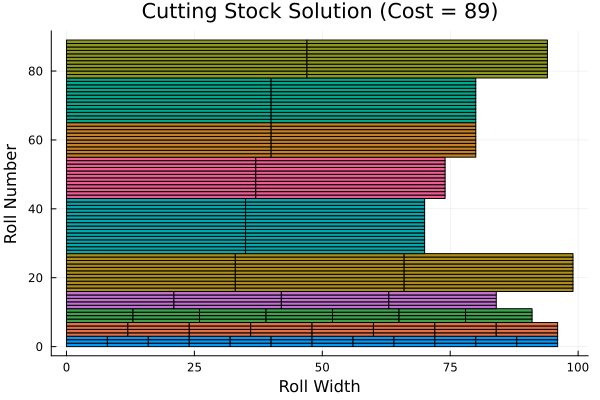

In [9]:
mp_ip = MasterProblem(dat, relax = false)
ss_ip = solve!(mp_ip)
plot_patterns(ss_ip)

### Adding new patterns

Generate columns on the LP relaxation.

In [10]:
mp = MasterProblem(dat, relax = true)
ss = solve!(mp)
println()
println("Solve time:\t", round(ss.solve_time, digits=2), " seconds")
println("Cost:\t\t", round(ss.objective_value, digits=2), " rolls")

Adding Pattern 11: 1*8 1*21 2*35 
Adding Pattern 12: 2*13 2*37 
Adding Pattern 13: 1*8 1*12 2*40 
Adding Pattern 14: 1*8 1*12 2*40 
Adding Pattern 15: 1*13 4*21 
Adding Pattern 16: 5*13 1*35 
Adding Pattern 17: 2*12 1*35 1*40 
Adding Pattern 18: 1*13 1*40 1*47 
Adding Pattern 19: 3*21 1*37 
Adding Pattern 20: 1*21 2*37 
Adding Pattern 21: 2*8 1*37 1*47 
Adding Pattern 22: 1*12 1*40 1*47 

Solve time:	0.1 seconds
Cost:		73.02 rolls


### Getting an integral solution

What's the cost of the rounded solution?

In [11]:
rounded_solution = ceil.(Int, ss.rolls)
println("Cost:\t\t", sum(rounded_solution), " rolls")

Cost:		78 rolls


Now solve the IP using the columns from the LP relaxation.

Solve time: 0.0 seconds


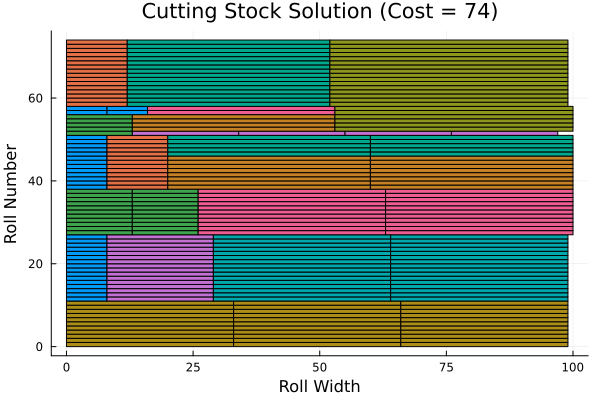

In [12]:
mp_ip = MasterProblem(dat, relax = false)
ss_ip = solve!(mp_ip)
println("Solve time: ", round(ss_ip.solve_time, digits=2), " seconds")
plot_patterns(ss_ip)

## Evolution of the bounds

To see how the quality of the solution progresses over each iteration of column generation, we'll solve the IP at each iteration (we had already solved the LP at each iteration).

In [13]:
objs_ip = Float64[]
n_initial = length(dat_temp.patterns)
for i=0:(length(ss.aux[:objectives])-1)
    if i > 0 # Adds the next pattern from column generation
		add_pattern!(dat_temp, dat.patterns[n_initial + i].quantities)
	end
    # Solves the IP on this set of columns and saves the objective value
	mp_temp = MasterProblem(dat_temp, relax = false)
	ss_temp = solve!(mp_temp)
	push!(objs_ip, ss_temp.objective_value)
end

Adding Pattern 11: 1*8 1*21 2*35 
Adding Pattern 12: 2*13 2*37 
Adding Pattern 13: 1*8 1*12 2*40 
Adding Pattern 14: 1*8 1*12 2*40 
Adding Pattern 15: 1*13 4*21 
Adding Pattern 16: 5*13 1*35 
Adding Pattern 17: 2*12 1*35 1*40 
Adding Pattern 18: 1*13 1*40 1*47 
Adding Pattern 19: 3*21 1*37 
Adding Pattern 20: 1*21 2*37 
Adding Pattern 21: 2*8 1*37 1*47 
Adding Pattern 22: 1*12 1*40 1*47 


Now, we'll calculate the lower bounds. An easy lower bound for the LP is the total amount of paper demanded, divided by roll size. We round up this value to get a lower bound for the IP.

In [14]:
piece_lengths = [piece.length for piece in dat.pieces];
easy_lb_lp = sum(piece_lengths .* dat.demands) / dat.max_length;
easy_lb_ip = ceil(Int, easy_lb_lp);

We can also calculate the dual bounds.

In [15]:
dual_lb_lp = ss.aux[:objectives] .* (1 .+ ss.aux[:reduced_costs]);
dual_lb_ip = ceil.(Int, dual_lb_lp);

Plot the upper and lower bounds for the LP and IP.

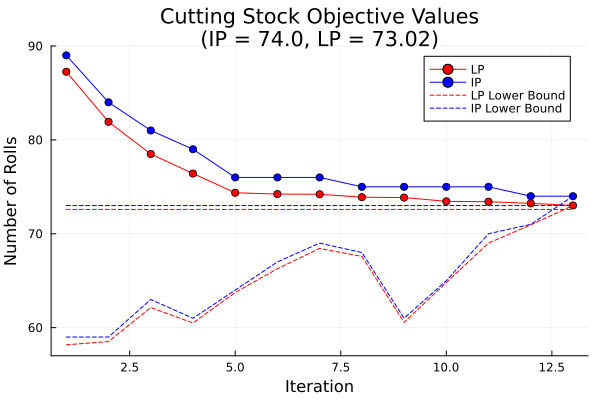

In [16]:
# Create plot
plt = Plots.plot(ylimits=(
        floor(Int, minimum(dual_lb_lp) - 1), 
        maximum(objs_ip) + 1)
)

# Plot objective values
Plots.plot!(ss.aux[:objectives], 
    lc = "red", marker = :circle, markercolor = "red",
    label = "LP")
Plots.plot!(objs_ip, 
    lc = "blue", marker = :circle, markercolor = "blue",
    label = "IP")

# Plot bounds
Plots.plot!([easy_lb_lp for obj in ss.aux[:objectives]], 
	lc="red", linestyle = :dash,
	label = "LP Lower Bound")
Plots.plot!(dual_lb_lp, 
	lc="red", linestyle = :dash,
	label = nothing)
Plots.plot!([easy_lb_ip for obj in ss.aux[:objectives]], 
	lc="blue", linestyle = :dash,
	label = "IP Lower Bound")
Plots.plot!(dual_lb_ip, 
	lc="blue", linestyle = :dash,
	label = nothing)

title!("Cutting Stock Objective Values\n(IP = $(minimum(objs_ip)), LP = $(round(minimum(ss.aux[:objectives]), digits=2)))")
xlabel!("Iteration")
ylabel!("Number of Rolls")
display(plt)

Note that the IP cost matches the rounded-up LP cost, which implies that for this instance, we have an optimal solution.